# Preparing data

We use the hourly data for bitcoin prices and volume from 2018-05-15 to 2022-03-01.

In [1]:
from data_handler import get_bitcoin_data

bitcoin_df = get_bitcoin_data()
bitcoin_df.head()

,unix,open,high,low,close,Volume BTC,Volume USD
0,1646092800,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06
1,1646089200,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06
2,1646085600,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07
3,1646082000,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06
4,1646078400,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07


At first we calculate the Mahalanobis distance for each data point. We will use the distance to detect the outliers in the data price values.
The mahanalobis distance is calculated as follows:

$$
MD = \sqrt{(X - \mu)^T \Sigma^{-1} (X - \mu)}
$$

where $X$ is the data point, $\mu$ is the mean value and $\Sigma$ is the covariance matrix.

In [2]:
INTERVAL_DAYS = 150

In [3]:
from data_handler import apply_mahalanobis_interval, index_by_datetime

# Apply the Mahalanobis to the bitcoin data for intervals of 150 days
bitcoin_df = apply_mahalanobis_interval(bitcoin_df, interval_days=INTERVAL_DAYS)

# Set the datetime as the index
bitcoin_df = index_by_datetime(bitcoin_df)

bitcoin_df.head()

,unix,open,high,low,close,Volume BTC,Volume USD,interval,MD
datetime,,,,,,,,,
2022-03-01 00:00:00,1646092800,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06,10,1.940364
2022-02-28 23:00:00,1646089200,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06,10,1.914923
2022-02-28 22:00:00,1646085600,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07,10,1.869486
2022-02-28 21:00:00,1646082000,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06,10,1.736784
2022-02-28 20:00:00,1646078400,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07,10,1.750101


## Evaluating prices

The close prices and mean values used to calculate the Mahalanobis distance are plotted below. 

The red line represents the interval mean value for the Mahalanobis distance.

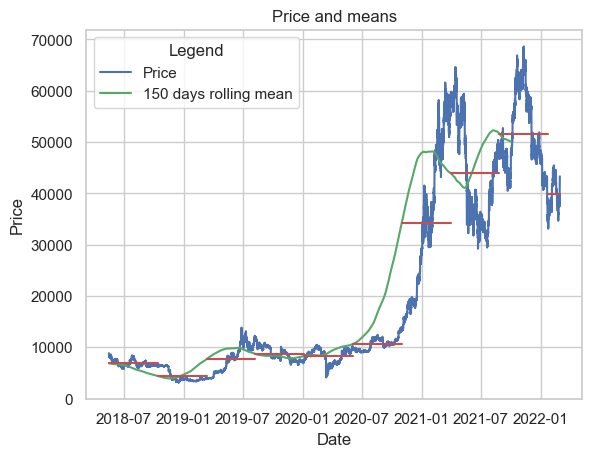

In [4]:
from data_plot import plot_price, plot_mahalanobis, plot_mahalanobis_distribution

plot_price(bitcoin_df)

The mahalanobis distance is plotted below. Each color represents a different data interval.

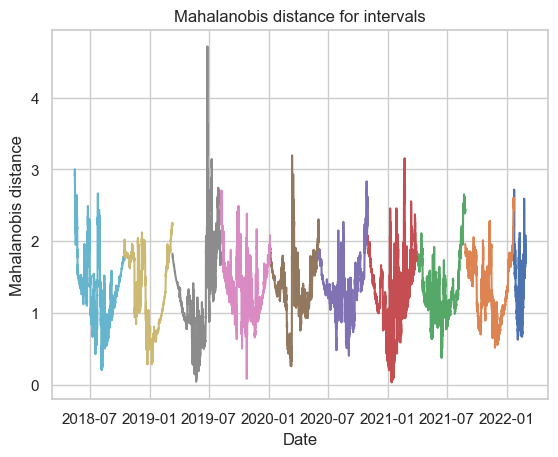

In [5]:
plot_mahalanobis(bitcoin_df, interval_days=INTERVAL_DAYS)

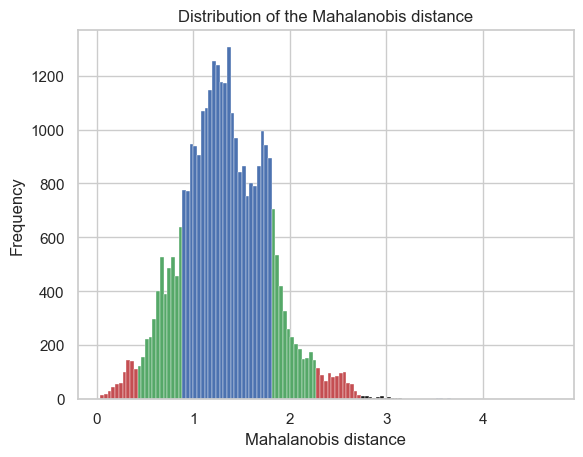

In [6]:
plot_mahalanobis_distribution(bitcoin_df)

### Evaluating prices based on Mahalanobis distance

In [25]:
STD_MAHALANOBIS = 3

In [26]:
from data_outliers import get_mahalanobis_outliers

# Get the outliers using the Mahalanobis distance
mahalanobis_outliers = get_mahalanobis_outliers(bitcoin_df, std_threshold=STD_MAHALANOBIS)

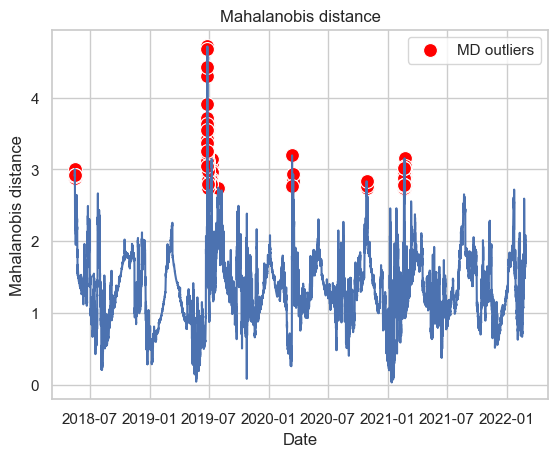

In [27]:
plot_mahalanobis(bitcoin_df, outliers=mahalanobis_outliers)

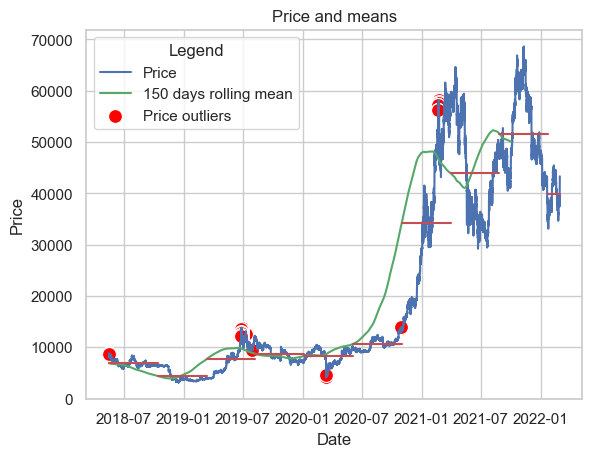

In [28]:
plot_price(bitcoin_df, outliers=mahalanobis_outliers)

## Evaluating volumes

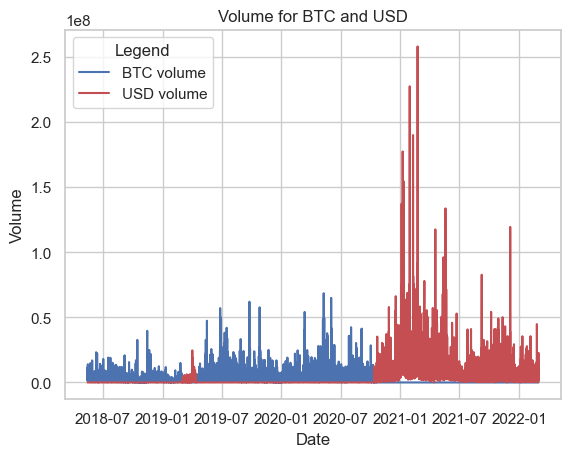

In [11]:
from data_plot import plot_volume, plot_price_volume_corelation
plot_volume(bitcoin_df)

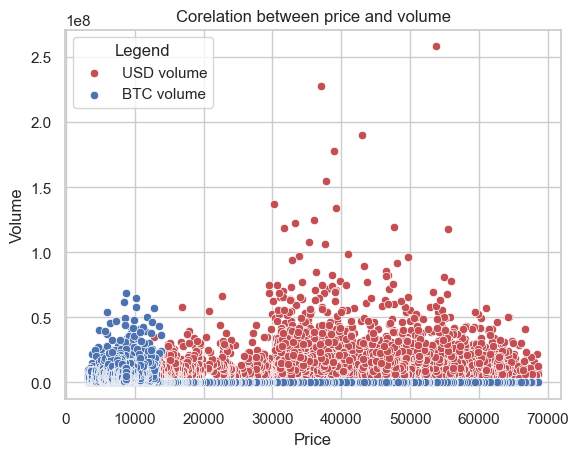

In [12]:
plot_price_volume_corelation(bitcoin_df)

### Price and volume correlation analysis

In [13]:
STD_THRESHOLD_VOLUME_USD = 8
STD_THRESHOLD_VOLUME_BTC = 8

In [14]:
from data_outliers import get_correlation_outliers

# Get the correlation outliers for the Volume USD and Volume BTC
correlation_outliers_USD = get_correlation_outliers(bitcoin_df, data_column='Volume USD', std_threshold=STD_THRESHOLD_VOLUME_USD)
correlation_outliers_BTC = get_correlation_outliers(bitcoin_df, data_column='Volume BTC', std_threshold=STD_THRESHOLD_VOLUME_BTC)

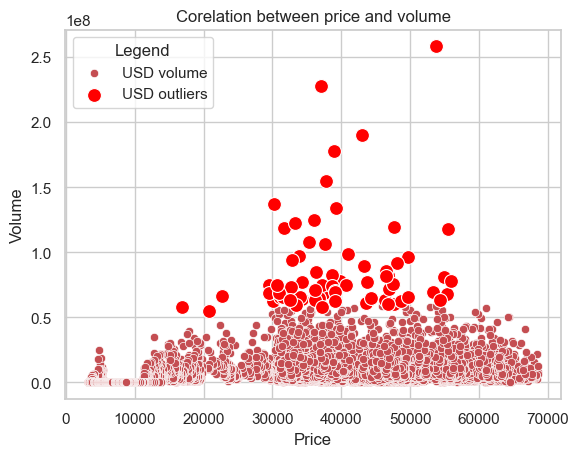

In [15]:
plot_price_volume_corelation(bitcoin_df, outliers_USD=correlation_outliers_USD, hide_BTC=True)

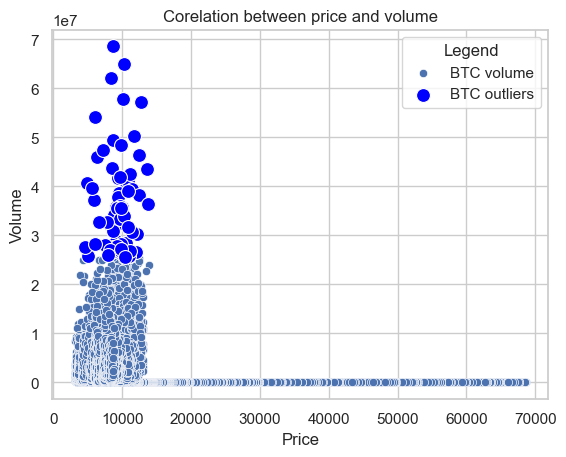

In [16]:
plot_price_volume_corelation(bitcoin_df, outliers_BTC=correlation_outliers_BTC, hide_USD=True)